In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]


C:\Users\louis\AppData\Local\Temp\ipykernel_34052\3301113859.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(spotify_songs.duration_ms, 25,
C:\Users\louis\AppData\Local\Temp\ipykernel_34052\3301113859.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(spotify_songs.duration_ms, 75,


In [3]:
spotify_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28953 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   track_id                   28953 non-null  object 
 1   track_name                 28953 non-null  object 
 2   track_artist               28953 non-null  object 
 3   track_popularity           28953 non-null  int64  
 4   track_album_id             28953 non-null  object 
 5   track_album_name           28953 non-null  object 
 6   playlist_name              28953 non-null  object 
 7   playlist_id                28953 non-null  object 
 8   playlist_genre             28953 non-null  object 
 9   playlist_subgenre          28953 non-null  object 
 10  danceability               28953 non-null  float64
 11  energy                     28953 non-null  float64
 12  key                        28953 non-null  int64  
 13  loudness                   28953 non-null  flo

In [4]:
spotify_data_cleaned[['track_album_release_month','track_album_release_year']]

,track_album_release_month,track_album_release_year
0,06,2019
1,12,2019
2,07,2019
3,07,2019
4,03,2019
...,...,...
32826,04,2014
32827,,2013
32828,04,2014
32830,04,2014


In [5]:
DeepnoteChart(spotify_data_cleaned, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"track_album_release_year","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"COUNT(*)","scale":{"type":"linear","zero":true},"aggregate":"count"},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

NameError: name 'DeepnoteChart' is not defined

In [ ]:
spotify_data_quant = spotify_data_cleaned[["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
spotify_data_quant

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...
32826,47,0.645,0.832,-5.595,0.0294,0.001060,0.002640,0.1990,0.3750,112.028,188371
32827,27,0.581,0.640,-8.367,0.0365,0.026600,0.000000,0.5720,0.2880,128.001,196993
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112


In [ ]:
cls = PCA(n_components=2)
pcs = cls.fit_transform(spotify_data_quant)
df = pd.DataFrame(data=cls.components_.T,columns=["1","2"])
df

,1,2
0,-3.657732e-05,-0.004180
1,-3.248035e-07,-0.000990
2,-2.972509e-08,0.000968
3,-6.402636e-06,0.009512
4,-1.592901e-07,0.000204
5,-2.526862e-07,-0.000868
6,-2.799756e-07,0.000140
7,1.935268e-08,0.000122
8,8.208653e-08,-0.000206
9,-1.213112e-05,0.999945


<BarContainer object of 2 artists>

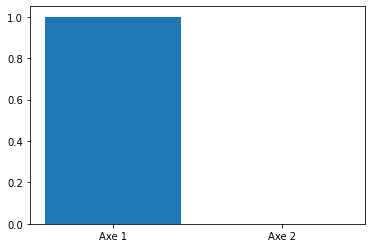

In [ ]:
plt.bar(["Axe 1", "Axe 2"], cls.explained_variance_ratio_)

Ahhhh ça c'est pas ouf :'(((((

In [ ]:
pcs.shape

(28953, 2)

<AxesSubplot:>

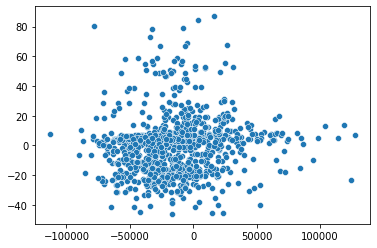

In [ ]:
sns.scatterplot(x=pcs[:1000,0],y=pcs[:1000,1])

In [ ]:
spotify_data_quant2 = spotify_data_cleaned[["track_popularity","danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]]
spotify_data_quant

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...
32826,47,0.645,0.832,-5.595,0.0294,0.001060,0.002640,0.1990,0.3750,112.028,188371
32827,27,0.581,0.640,-8.367,0.0365,0.026600,0.000000,0.5720,0.2880,128.001,196993
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112


In [ ]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(spotify_data_quant2)
cls.components_

array([[ 9.99998690e-01,  4.00243235e-04, -6.90331727e-04,
         3.51378179e-05,  5.90173748e-04, -1.18733859e-03,
        -2.75208574e-04,  3.86221246e-04],
       [-2.74790269e-04, -1.11316308e-01, -4.99978199e-01,
        -1.57128461e-02,  6.41667507e-01,  1.82612991e-01,
        -7.20220938e-02, -5.35827990e-01],
       [ 1.27685668e-03, -2.35529057e-01,  2.71552071e-01,
        -5.38417561e-02, -5.01080191e-01,  3.34758144e-01,
         1.03910446e-01, -7.02810940e-01],
       [ 8.72031414e-04,  1.63870507e-01,  5.41546863e-02,
        -2.96314988e-02,  8.67326794e-02,  9.19555999e-01,
        -3.85830584e-02,  3.38733665e-01],
       [ 3.42344304e-04, -4.06320156e-01,  3.16346684e-01,
        -2.60159804e-02,  3.60176060e-01,  6.83855012e-03,
         7.68036287e-01,  1.20409549e-01]])

<BarContainer object of 5 artists>

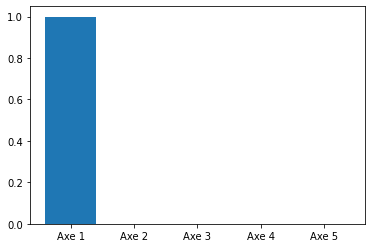

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)

<AxesSubplot:>

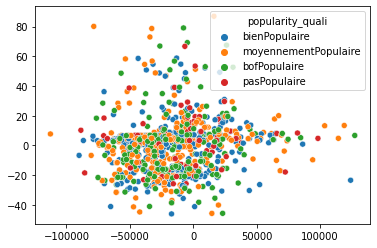

In [ ]:
sns.scatterplot(x=pcs[:1000,0],y=pcs[:1000,1],hue=spotify_data_cleaned.popularity_quali[:1000])

<AxesSubplot:>

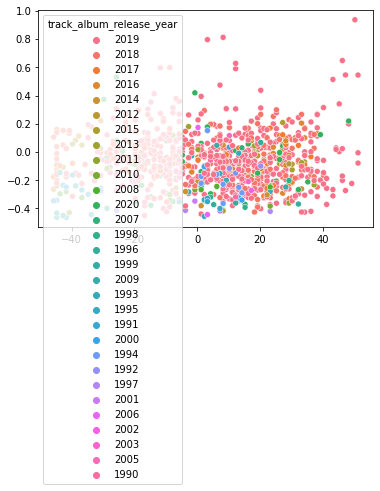

In [ ]:
sns.scatterplot(x=pcs[:1000,0],y=pcs[:1000,1],hue=spotify_data_cleaned.track_album_release_year[:1000])

<AxesSubplot:>

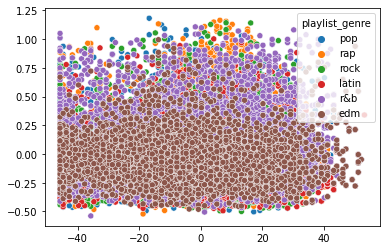

In [ ]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=spotify_data_cleaned.playlist_genre)

In [ ]:
spotify_data_quant3 = spotify_data_cleaned[["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
spotify_data_quant3

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...
32826,47,0.645,0.832,-5.595,0.0294,0.001060,0.002640,0.1990,0.3750,112.028
32827,27,0.581,0.640,-8.367,0.0365,0.026600,0.000000,0.5720,0.2880,128.001
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989


In [ ]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(spotify_data_quant3)
cls.components_

array([[-1.02285660e-04, -9.76757461e-04,  9.67237619e-04,
         9.76210929e-03,  2.09961546e-04, -8.57412514e-04,
         1.46191149e-04,  1.20445047e-04, -2.07948018e-04,
         9.99950970e-01],
       [ 9.99963474e-01,  4.00301372e-04, -6.84215083e-04,
         8.39277026e-03,  3.51395138e-05,  5.86148917e-04,
        -1.18861393e-03, -2.74561802e-04,  3.86892317e-04,
         2.21871490e-05],
       [ 8.34886647e-03, -1.55923128e-03, -4.19453707e-02,
        -9.98591438e-01,  2.07253775e-04,  2.74380826e-02,
         9.44305547e-03, -4.38326113e-03, -5.10625649e-03,
         9.81030972e-03],
       [ 6.69409965e-04, -2.50568421e-01, -7.88195723e-02,
         1.27559453e-02, -5.16826908e-02,  5.17549234e-02,
         3.37207450e-01,  3.43743835e-02, -9.00332947e-01,
        -4.78419962e-04],
       [ 1.48375804e-03,  5.50180309e-03,  3.64727062e-01,
        -3.59004075e-02, -3.29058092e-02, -8.47783954e-01,
         3.64822063e-01,  9.59060805e-02,  5.94872218e-02,
        -7.

<BarContainer object of 5 artists>

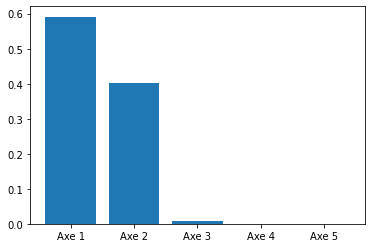

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)

<AxesSubplot:>

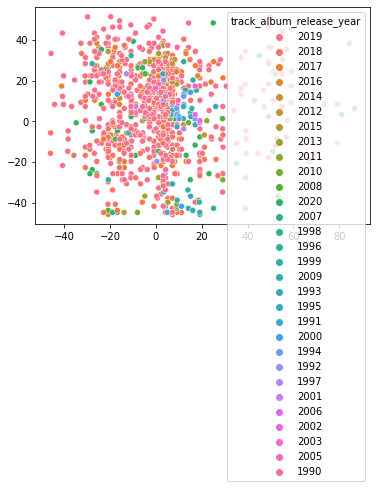

In [ ]:
sns.scatterplot(x=pcs[:1000,0],y=pcs[:1000,1],hue=spotify_data_cleaned.track_album_release_year[:1000])

In [ ]:
spotify_data_cleaned = spotify_data_cleaned.assign(
        populartity_quali = "tresPopulaire"
)

In [ ]:
mask1 = spotify_data_cleaned.track_popularity <= 80
mask2 = spotify_data_cleaned.track_popularity <=60
mask3 = spotify_data_cleaned.track_popularity <=40
mask4 = spotify_data_cleaned.track_popularity <=20

spotify_data_cleaned.loc[mask1,"popularity_quali"] = "bienPopulaire"
spotify_data_cleaned.loc[mask2,"popularity_quali"] = "moyennementPopulaire"
spotify_data_cleaned.loc[mask3,"popularity_quali"] = "bofPopulaire"
spotify_data_cleaned.loc[mask4,"popularity_quali"] = "pasPopulaire"

<AxesSubplot:>

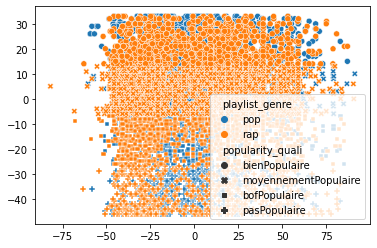

In [ ]:
sns.scatterplot(x=pcs[:10000,0],y=pcs[:10000,1],style=spotify_data_cleaned.popularity_quali[:10000], hue=spotify_data_cleaned.playlist_genre[:10000])

In [ ]:
spotify_data_quant4 = spotify_data_cleaned[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence"]]
spotify_data_quant4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180
1,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930
2,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250
...,...,...,...,...,...,...,...,...
32826,0.645,0.832,-5.595,0.0294,0.001060,0.002640,0.1990,0.3750
32827,0.581,0.640,-8.367,0.0365,0.026600,0.000000,0.5720,0.2880
32828,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360


In [ ]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(spotify_data_quant4)
cls.components_

array([[-9.11946975e-04, -4.19130347e-02, -9.98671273e-01,
         1.09589015e-05,  2.75388044e-02,  9.78438897e-03,
        -4.29736562e-03, -5.05628832e-03],
       [-2.60126476e-01, -4.65430813e-02,  1.00813953e-02,
        -5.19151108e-02,  2.14700040e-04,  3.63421822e-01,
         4.30707351e-02, -8.90752822e-01],
       [ 1.02212875e-03,  3.87340729e-01, -3.68148346e-02,
        -2.65355096e-02, -8.32673243e-01,  3.56955508e-01,
         1.00092402e-01,  1.30867096e-01],
       [ 1.51817761e-01,  7.93688130e-04,  1.80107397e-02,
        -2.39511231e-02,  4.04340116e-01,  8.47921367e-01,
        -5.74121206e-02,  3.00491214e-01],
       [-4.06185505e-01,  2.41626896e-01, -8.15795679e-03,
        -1.75589134e-02,  2.24110548e-01, -2.62904385e-02,
         8.40593468e-01,  1.36897068e-01]])

<BarContainer object of 5 artists>

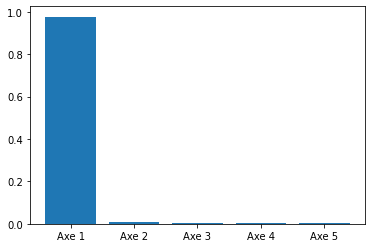

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)

In [ ]:
spotify_data_quant5 = spotify_data_cleaned[["danceability","energy","loudness","acousticness"]]


In [ ]:
cls = PCA(n_components=4)
pcs = cls.fit_transform(spotify_data_quant5)
cls.components_

array([[-9.05932129e-04, -4.19165096e-02, -9.98741025e-01,
         2.75417808e-02],
       [-2.93185959e-02,  3.65552436e-01, -4.09457568e-02,
        -9.29427394e-01],
       [-9.53671093e-01,  2.68320574e-01, -6.64828859e-03,
         1.35909224e-01],
       [ 2.99417846e-01,  8.90291240e-01, -2.82065496e-02,
         3.41957383e-01]])

<BarContainer object of 4 artists>

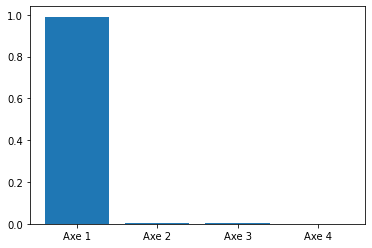

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4"], cls.explained_variance_ratio_)

In [ ]:
spotify_data_quant5= spotify_data_cleaned[["track_popularity","danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]]
#spotify_data_quant5.track_popularity = spotify_data_quanti.track_popularity / 100

NameError: name 'spotify_data_quanti' is not defined

In [ ]:
cls = PCA(n_components=8)
pcs = cls.fit_transform(spotify_data_quant)
cls.components_

array([[-3.65773188e-05, -3.24803485e-07, -2.97250934e-08,
        -6.40263613e-06, -1.59290114e-07, -2.52686170e-07,
        -2.79975628e-07,  1.93526796e-08,  8.20865333e-08,
        -1.21311219e-05,  9.99999999e-01],
       [-4.18048650e-03, -9.89870734e-04,  9.68384355e-04,
         9.51219935e-03,  2.04273789e-04, -8.68347524e-04,
         1.39589519e-04,  1.21937370e-04, -2.06195044e-04,
         9.99944624e-01,  1.20380163e-05],
       [ 9.99962426e-01,  3.44522326e-04, -6.87868701e-04,
         7.45536052e-03,  1.10140475e-05,  5.44252475e-04,
        -1.23956716e-03, -2.72410037e-04,  4.01022128e-04,
         4.11140621e-03,  3.66734104e-05],
       [ 7.37485770e-03, -1.07186016e-03, -4.22684237e-02,
        -9.98563517e-01,  4.51274042e-04,  2.80715075e-02,
         1.00350116e-02, -4.44084826e-03, -5.30102617e-03,
         9.59209937e-03, -5.99843218e-06],
       [ 7.07251023e-04, -2.54724540e-01, -7.45109959e-02,
         1.25213629e-02, -5.32845687e-02,  4.08111886e-02,
  

<BarContainer object of 8 artists>

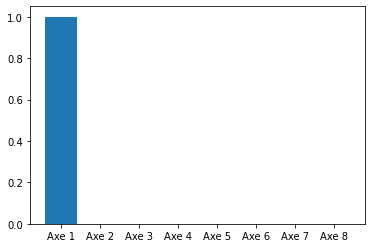

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5","Axe 6","Axe 7","Axe 8"], cls.explained_variance_ratio_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>